#Exploracion de datos

En dicho archivo se analiza los tipos de datos proveidos por valley, tanto de la estacion meteorologica como la del equipo.
Las coordenadas GPS de dicho pivot y estacion meteorologica son:


*   Latitud: -34093989°
*   Longitud: -68.904443°



In [1]:
!pip install -U pandas_profiling
!pip install funpymodeling
!pip install tensorflow
!pip install catboost
!pip install psycopg2

     |████████████████████████████████| 261 kB 128 kB/s eta 0:00:01
     |████████████████████████████████| 102 kB 368 kB/s ta 0:00:01
     |████████████████████████████████| 676 kB 388 kB/s eta 0:00:01
     |████████████████████████████████| 13.7 MB 390 kB/s eta 0:00:01    |██████                          | 2.5 MB 381 kB/s eta 0:00:30     |███████████▉                    | 5.1 MB 333 kB/s eta 0:00:26
     |████████████████████████████████| 3.1 MB 332 kB/s eta 0:00:01
     |████████████████████████████████| 303 kB 328 kB/s eta 0:00:01
     |████████████████████████████████| 812 kB 76 kB/s eta 0:00:012
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27084 sha256=c5fb47485a3282bd1f7be7ac9f406cecb1fc07789b558a459e7a17ee31e88590
  Stored in directory: /home/santiago/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=35432b50d1e8b4c3a50a43a06b

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=f508c33be02849930c6bb7073f1f85734a0af1b9c7e1da7ea7c7f65ab226221c
  Stored in directory: /home/santiago/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
     |▌                               | 7.0 MB 295 kB/s eta 0:25:27^C   |▏                               | 2.6 MB 379 kB/s eta 0:20:02

ERROR: Operation cancelled by user
     |                                | 40 kB 364 kB/s eta 0:03:30^C

ERROR: Operation cancelled by user
  Using cached psycopg2-2.9.1.tar.gz (379 kB)
  ERROR: Command errored out with exit status 1:
   command: /home/santiago/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-q3f7hxq7/psycopg2/setup.py'"'"'; __file__='"'"'/tmp/pip-install-q3f7hxq7/psycopg2/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close(

In [5]:
import numpy as np
import pandas as pd
import psycopg2 as ps
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas_profiling
import pandas_profiling
import tensorflow as tf
from tensorflow import keras

import psycopg2
import sys

from funpymodeling.exploratory import status, freq_tbl, profiling_num
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [6]:
#Enter the values for you database connection
dsn_database = "dsemet"            # e.g. "compose"
dsn_hostname = "localhost" # e.g.: "aws-us-east-1-portal.4.dblayer.com"
dsn_port = "5432"                 # e.g. 11101 
dsn_uid = "postgres"        # e.g. "admin"
dsn_pwd = "enter"      # e.g. "xxx"

In [8]:
try:
    conn_string = "host="+dsn_hostname+" port="+dsn_port+" dbname="+dsn_database+" user="+dsn_uid+" password="+dsn_pwd
    print ("Connecting to database\n  ->%s" % (conn_string))
    conn=psycopg2.connect(conn_string)
    print ("Connected!\n")
except:
    print ("Unable to connect to the database.")

Connecting to database
  ->host=localhost port=5432 dbname=dsemet user=postgres password=enter
Connected!



In [9]:
cursor = conn.cursor()
dat = cursor.execute("""SELECT * FROM public.dsemet""")
rows = cursor.fetchall()

In [12]:
col = [dat[0] for dat in cursor.description]

In [14]:
conn.commit()

In [15]:
dsEMet = pd.DataFrame(rows, columns=col)

In [17]:
conn.close()

# Analisis básico de datos

* Imprimir las primeras filas del dataset
* Imprimir los tipos de datos de cada columna
* Describir cada columna con estadisticas basicas
* Ver la distribución de la variable a predecir (Llueve mañana? llueve en 12 h?)
* Transformar la variable a predecir en un problema de clasificación binario

### Estación Meteorológica 

In [18]:
dsEMet.head()

,timestamp,power,battery,temperature,humidity,solar_radiation,an,barometric_pressure,wind_direction,wind_bearing,wind_speed,wind_gust,rain
0,2021-10-30 12:42:50,On,4.14,17.89,39.9,295,,861.6,NNW,342,8.05,20.92,0.0
1,2021-10-30 12:42:50,On,4.14,18.5,37.3,311,,861.9,N,355,6.44,20.92,0.0
2,2021-10-30 12:42:50,On,4.15,17.94,37.2,482,,863.0,E,91,8.05,20.92,0.0
3,2021-10-30 12:42:50,On,4.12,17.56,39.3,441,,862.5,ESE,107,12.87,19.31,0.0
4,2021-10-30 12:42:50,On,4.09,16.78,39.2,664,,863.6,ESE,109,3.22,19.31,0.0


In [19]:
dsEMet.describe()

<ipython-input-19-b6e1e5db230f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dsEMet.describe()


,timestamp,power,battery,temperature,humidity,solar_radiation,an,barometric_pressure,wind_direction,wind_bearing,wind_speed,wind_gust,rain
count,30374,30374,30374,30374,30374,30374,30374,30374,30374,30374,30374,30374,30374
unique,1,1,94,798,937,775,1,283,17,347,35,47,29
top,2021-10-30 12:42:50,On,4.22,12.17,91.8,0,,868.4,SSW,355,6.44,9.66,0.0
freq,30374,30374,7298,120,63,14618,30374,362,4479,456,4342,3211,29942
first,2021-10-30 12:42:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-10-30 12:42:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dsEMet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30374 entries, 0 to 30373
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            30374 non-null  datetime64[ns]
 1   power                30374 non-null  object        
 2   battery              30374 non-null  object        
 3   temperature          30374 non-null  object        
 4   humidity             30374 non-null  object        
 5   solar_radiation      30374 non-null  object        
 6   an                   30374 non-null  object        
 7   barometric_pressure  30374 non-null  object        
 8   wind_direction       30374 non-null  object        
 9   wind_bearing         30374 non-null  object        
 10  wind_speed           30374 non-null  object        
 11  wind_gust            30374 non-null  object        
 12  rain                 30374 non-null  object        
dtypes: datetime64[ns](1), object(12

In [21]:
status (dsEMet)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,timestamp,0,0.0,0,0.0,1,datetime64[ns]
1,power,0,0.0,0,0.0,1,object
2,battery,0,0.0,0,0.0,94,object
3,temperature,0,0.0,0,0.0,798,object
4,humidity,0,0.0,0,0.0,937,object
5,solar_radiation,0,0.0,0,0.0,775,object
6,an,0,0.0,0,0.0,1,object
7,barometric_pressure,0,0.0,0,0.0,283,object
8,wind_direction,0,0.0,0,0.0,17,object
9,wind_bearing,0,0.0,0,0.0,347,object


# Limpieza de datos
*   Analizar la cantidad de NaNs
*   Darle un tratamiento a los NaNs
*   Verificar no estar cambiando las distribuciones

### Estación Meteorológica 

In [ ]:
# Elimino la variable Power, Battery por no ser de importancia y la variable AN (5) por tener el 100% de NaN
dsEMet.drop(['Power', 'Battery', 'AN (5)'], axis=1, inplace=True)

In [ ]:
# La variable Wind Direction tiene 0.012% de NaN por lo tanto esas filas se van a eliminar directamente
dsEMet.dropna(subset=['Wind Direction'], inplace=True)

# Ingeniería de features básica

* Transformar el tipo en one-hot-encoding
* Hacer un analisis de correlaciones
* Hacer plot-box de las variables mas correlacionadas con la salida
* Transformar el vendor id en vendor idx
* Separar los datos en train (70%), validation (20%) y test (10%).
* Normalizar los datos para probar modelos con datos normalizados y sin normalizar

### Estación Meteorológica 

In [ ]:
def OHE(ds, string):
  y = pd.get_dummies(ds[string], prefix=string)
  ds = pd.concat([ds, y], axis=1)
  ds.drop([string], axis=1, inplace=True)
  return ds

dsEMet = OHE(dsEMet, "Wind Direction")

In [ ]:
dsEMet['RainIn12h'] = dsEMet['Rain']
dsEMet['RainTomorrow'] = dsEMet['Rain']

In [ ]:
from collections import deque
R12 = deque(dsEMet['Rain'])
R12.rotate(24) # 24 significa 12h
dsEMet['RainIn12h'] = list(R12)
dsEMet['RainIn12h'] = dsEMet.RainIn12h.apply(lambda label: 0 if label <=0.1 else 1)

RT = deque(dsEMet['Rain'])
RT.rotate(48) # 48 significa 24h
dsEMet['RainTomorrow'] = list(RT)

In [ ]:
print(len(dsEMet[dsEMet['RainIn12h'] == 0]))
print(len(dsEMet[dsEMet['RainIn12h'] == 1]))

29905
432


In [ ]:
dsEMet['    "Timestamp"'] = pd.to_datetime(dsEMet['    "Timestamp"'])
dsEMet['year'], dsEMet['month'] = dsEMet['    "Timestamp"'].dt.year, dsEMet['    "Timestamp"'].dt.month
dsEMet = OHE(dsEMet, "year")

In [ ]:
# Codificación de Meses en Slots:

def month_slot(value):
    if value<=3: # Verano ()
        return "Verano"
    if value<=6:  # Otroño ()
        return "Otoño"
    if value<=9:  # Invierno ()
        return "Invierno"
    else:         # Primavera ()
        return "Primavera"

dsEMet['month_Q'] = dsEMet['month'].apply(month_slot)

In [ ]:
dsEMet = OHE(dsEMet, "month_Q")

In [ ]:
from datetime import datetime
dsEMet['Date'] = dsEMet['    "Timestamp"'].dt.strftime('%d-%m-%y')
dsEMet['DoY'] = dsEMet['Date'].apply(lambda x: pd.Period(x).dayofyear)

In [ ]:
dsEMet['Day_sin'] = np.sin((dsEMet['DoY'] -1) * (2. * np.pi / 365))
dsEMet['Day_cos'] = np.cos((dsEMet['DoY'] -1) * (2. * np.pi / 365))

In [ ]:
dsEMet.drop(['    "Timestamp"', 'Date', 'DoY', 'month'], axis=1, inplace=True)
dsEMet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30337 entries, 0 to 30372
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (°C)        30337 non-null  float64
 1   Humidity                30337 non-null  float64
 2   Solar Radiation (W/m2)  30337 non-null  int64  
 3   Barometric Pressure     30337 non-null  float64
 4   Wind Bearing            30337 non-null  int64  
 5   Wind Speed              30337 non-null  float64
 6   Wind Gust               30337 non-null  float64
 7   Rain                    30337 non-null  float64
 8   Wind Direction_E        30337 non-null  uint8  
 9   Wind Direction_ENE      30337 non-null  uint8  
 10  Wind Direction_ESE      30337 non-null  uint8  
 11  Wind Direction_N        30337 non-null  uint8  
 12  Wind Direction_NE       30337 non-null  uint8  
 13  Wind Direction_NNE      30337 non-null  uint8  
 14  Wind Direction_NNW      30337 non-null

Correlación de Pearson

[Text(0, 0.5, 'Temperature (°C)'),
 Text(0, 1.5, 'Humidity'),
 Text(0, 2.5, 'Solar Radiation (W/m2)'),
 Text(0, 3.5, 'Barometric Pressure'),
 Text(0, 4.5, 'Wind Bearing'),
 Text(0, 5.5, 'Wind Speed'),
 Text(0, 6.5, 'Wind Gust'),
 Text(0, 7.5, 'Rain'),
 Text(0, 8.5, 'Wind Direction_E'),
 Text(0, 9.5, 'Wind Direction_ENE'),
 Text(0, 10.5, 'Wind Direction_ESE'),
 Text(0, 11.5, 'Wind Direction_N'),
 Text(0, 12.5, 'Wind Direction_NE'),
 Text(0, 13.5, 'Wind Direction_NNE'),
 Text(0, 14.5, 'Wind Direction_NNW'),
 Text(0, 15.5, 'Wind Direction_NW'),
 Text(0, 16.5, 'Wind Direction_S'),
 Text(0, 17.5, 'Wind Direction_SE'),
 Text(0, 18.5, 'Wind Direction_SSE'),
 Text(0, 19.5, 'Wind Direction_SSW'),
 Text(0, 20.5, 'Wind Direction_SW'),
 Text(0, 21.5, 'Wind Direction_W'),
 Text(0, 22.5, 'Wind Direction_WNW'),
 Text(0, 23.5, 'Wind Direction_WSW'),
 Text(0, 24.5, 'RainIn12h'),
 Text(0, 25.5, 'RainTomorrow'),
 Text(0, 26.5, 'year_2019'),
 Text(0, 27.5, 'year_2020'),
 Text(0, 28.5, 'year_2021'),
 Text(

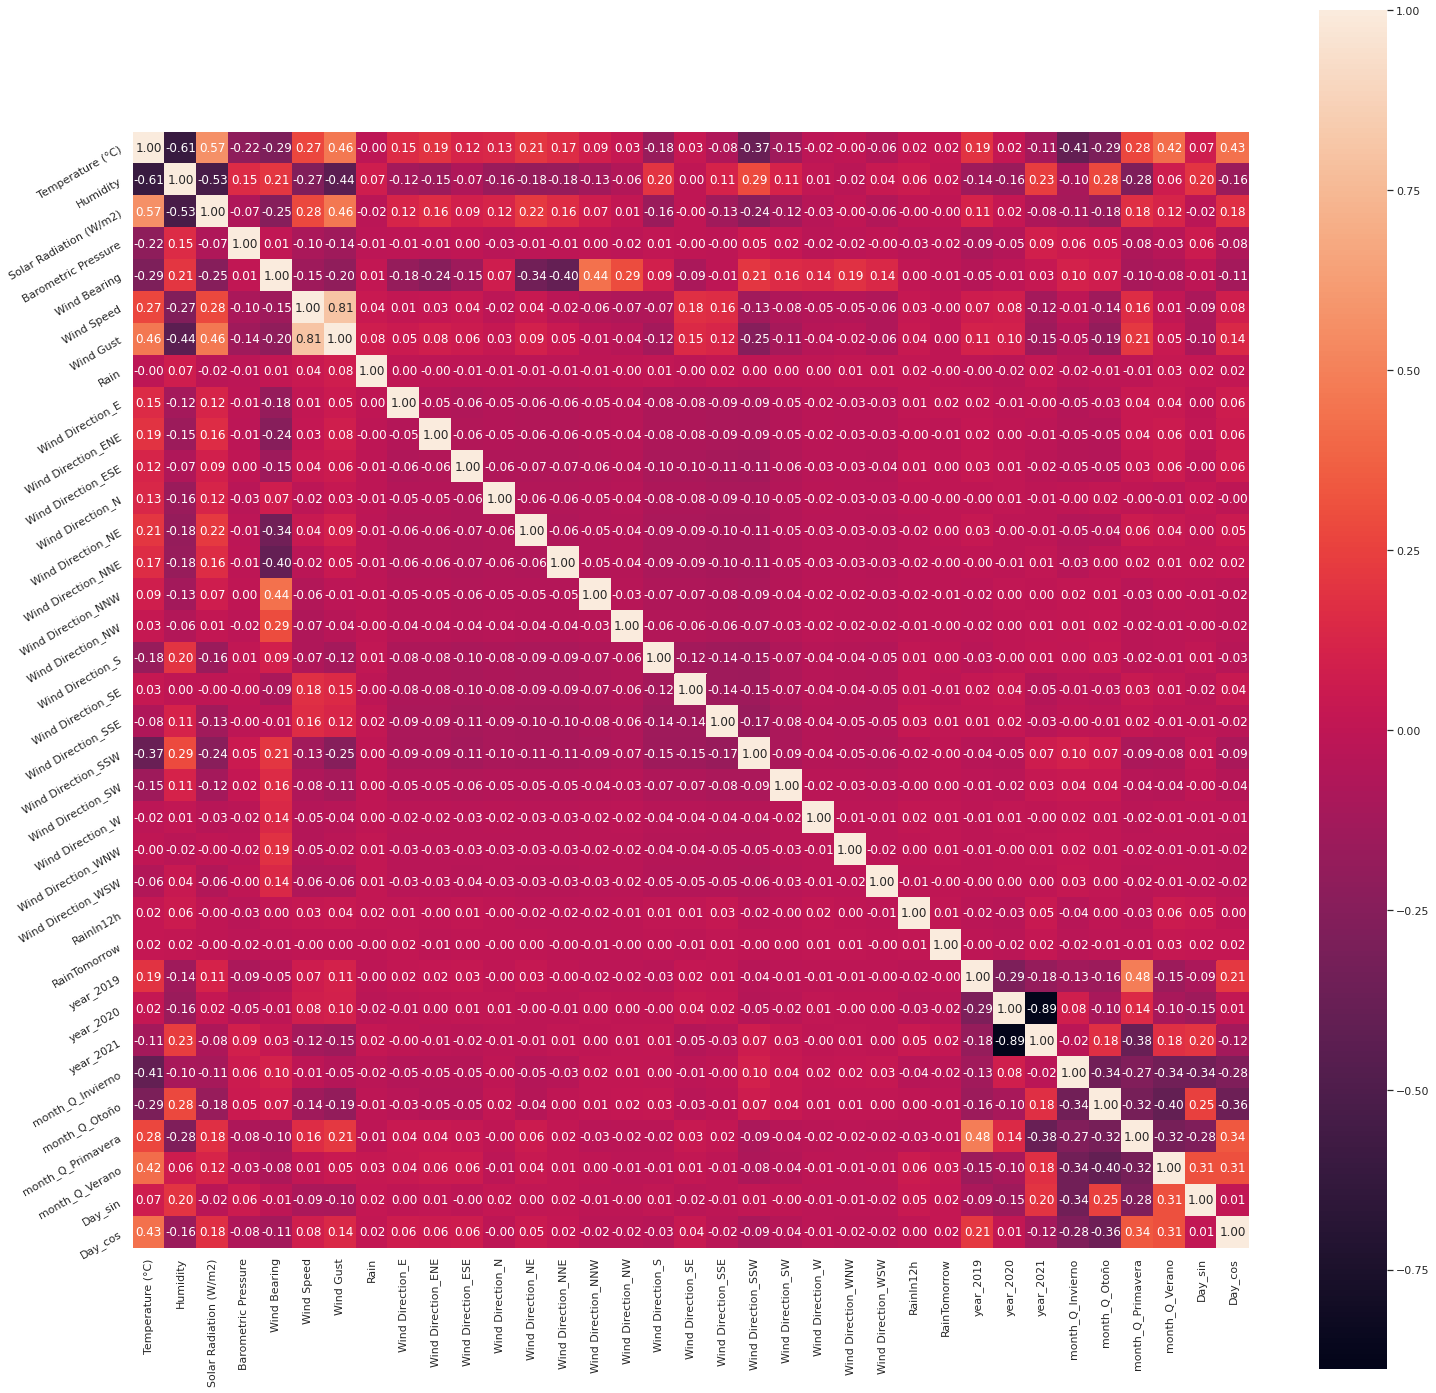

In [ ]:
fig, ax = plt.subplots(1, figsize=(25, 25))
pearson_corr = dsEMet.corr(method='pearson')
ax = sns.heatmap(pearson_corr, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)   

Correlacion de Kendall

[Text(0, 0.5, 'Temperature (°C)'),
 Text(0, 1.5, 'Humidity'),
 Text(0, 2.5, 'Solar Radiation (W/m2)'),
 Text(0, 3.5, 'Barometric Pressure'),
 Text(0, 4.5, 'Wind Bearing'),
 Text(0, 5.5, 'Wind Speed'),
 Text(0, 6.5, 'Wind Gust'),
 Text(0, 7.5, 'Rain'),
 Text(0, 8.5, 'Wind Direction_E'),
 Text(0, 9.5, 'Wind Direction_ENE'),
 Text(0, 10.5, 'Wind Direction_ESE'),
 Text(0, 11.5, 'Wind Direction_N'),
 Text(0, 12.5, 'Wind Direction_NE'),
 Text(0, 13.5, 'Wind Direction_NNE'),
 Text(0, 14.5, 'Wind Direction_NNW'),
 Text(0, 15.5, 'Wind Direction_NW'),
 Text(0, 16.5, 'Wind Direction_S'),
 Text(0, 17.5, 'Wind Direction_SE'),
 Text(0, 18.5, 'Wind Direction_SSE'),
 Text(0, 19.5, 'Wind Direction_SSW'),
 Text(0, 20.5, 'Wind Direction_SW'),
 Text(0, 21.5, 'Wind Direction_W'),
 Text(0, 22.5, 'Wind Direction_WNW'),
 Text(0, 23.5, 'Wind Direction_WSW'),
 Text(0, 24.5, 'RainIn12h'),
 Text(0, 25.5, 'RainTomorrow'),
 Text(0, 26.5, 'year_2019'),
 Text(0, 27.5, 'year_2020'),
 Text(0, 28.5, 'year_2021'),
 Text(

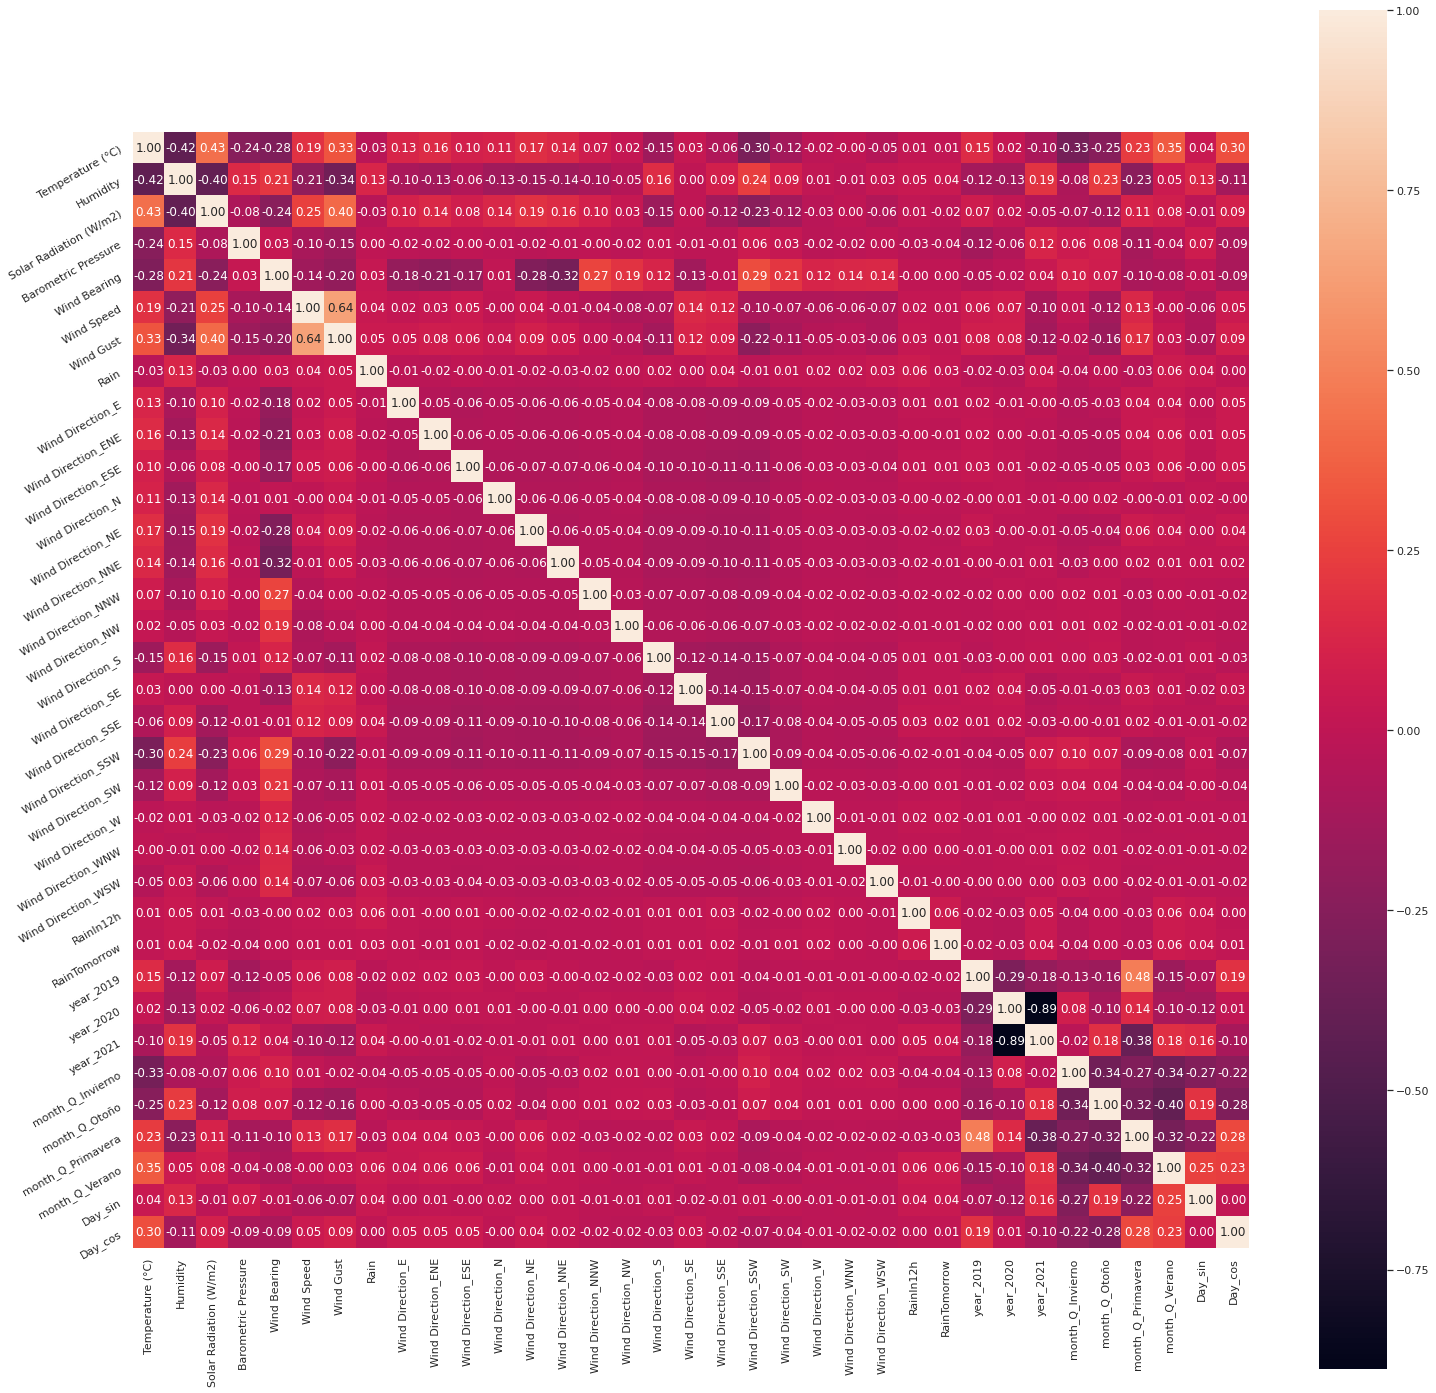

In [ ]:
fig, ax = plt.subplots(1, figsize=(25, 25))
kendall_corr = dsEMet.corr(method='kendall')
ax = sns.heatmap(kendall_corr, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)   

In [ ]:
# separar los datos en train (70%), valid (20%) y test (10%)

"""
x_train                 todas las columnas menos RainIn12h y RainTomorrow
x_validation
x_test

y_train                 la columna RainIn12h o RainTomorrow
y_validation
y_test

"""
# Probamos con RainIn12h
final_dataset = dsEMet.drop(['RainIn12h', 'RainTomorrow'], axis=1, inplace=False)

final_dataset = final_dataset.to_numpy()
label = dsEMet.RainIn12h.to_numpy()

# Normalizamos los datos
normalized_data = (final_dataset - np.min(final_dataset, axis=0)) / (np.max(final_dataset, axis=0)-np.min(final_dataset, axis=0))

# Hacer un split del dataset en training (70%), validation (20%) y testing (10%).
n = final_dataset.shape[0]
idx = np.random.permutation(np.arange(0, n))
train_idx = idx[:int(0.7 * n)]
valid_idx = idx[int(0.7 * n):int(0.9 * n)]
test_idx = idx[int(0.9 * n):]
assert len(train_idx) + len(valid_idx) + len(test_idx) == len(idx)

X_train = normalized_data[train_idx,:]
y_train = label[train_idx]

X_test = normalized_data[test_idx,:]
y_test = label[test_idx]

X_valid = normalized_data[valid_idx,:]
y_valid = label[valid_idx]

In [ ]:
dsEMet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30337 entries, 0 to 30372
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (°C)        30337 non-null  float64
 1   Humidity                30337 non-null  float64
 2   Solar Radiation (W/m2)  30337 non-null  int64  
 3   Barometric Pressure     30337 non-null  float64
 4   Wind Bearing            30337 non-null  int64  
 5   Wind Speed              30337 non-null  float64
 6   Wind Gust               30337 non-null  float64
 7   Rain                    30337 non-null  float64
 8   Wind Direction_E        30337 non-null  uint8  
 9   Wind Direction_ENE      30337 non-null  uint8  
 10  Wind Direction_ESE      30337 non-null  uint8  
 11  Wind Direction_N        30337 non-null  uint8  
 12  Wind Direction_NE       30337 non-null  uint8  
 13  Wind Direction_NNE      30337 non-null  uint8  
 14  Wind Direction_NNW      30337 non-null

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_valid.shape)
print(y_valid.shape)

(21235, 33)
(21235,)
(3034, 33)
(3034,)
(6068, 33)
(6068,)


# Modelos

In [ ]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

## Modelo Base

Para los siguientes modelos se va a analizar la métrica F1 score ya que el detaset esta altamente desbalanceado debido a las condiciones climáticas de la zona. El valor que realmente importa es si se predice que va a llover y realmente llovió.

In [ ]:
prob_llueve = label.sum()/label.shape[0]
prob_llueve

0.014240036918614233

In [ ]:
class RandomModel(object):

    def fit(self, X, y):
        return None

    def predict(self, X):
      a = np.random.uniform(0, 1, size=X.shape[0])
      mask = a <= prob_llueve
      prediction = np.zeros(X.shape[0]).reshape(-1,1)
      prediction[mask] = 1
      return prediction

In [ ]:
random_model = RandomModel()
random_model.fit(X_train, y_train)
rm_predictions = random_model.predict(X_valid)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, rm_predictions)
roc_auc = metrics.auc(fpr, tpr)
print(metrics.auc(fpr, tpr))

0.506377678663528


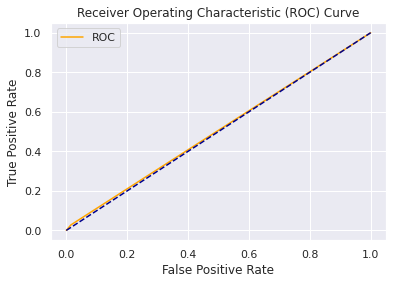

In [ ]:
plot_roc_cur(fpr, tpr)

In [ ]:
F1_score = metrics.f1_score(y_valid, rm_predictions)
F1_score

0.030000000000000002

Como se observa, el modelo base solo tuvo un acierto de los dias que llovio de solo un 3%. En general los demas modelos tienen que tratar de obtener una mejor prediccion.

## Logistic Regression

Accuracy = 0.986156888595913
ROC Area under Curve = 0.5
Cohen's Kappa = 0.0
Time taken = 3.8410942554473877
              precision    recall  f1-score   support

           0    0.98616   1.00000   0.99303      2992
           1    0.00000   0.00000   0.00000        42

    accuracy                        0.98616      3034
   macro avg    0.49308   0.50000   0.49652      3034
weighted avg    0.97251   0.98616   0.97928      3034



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


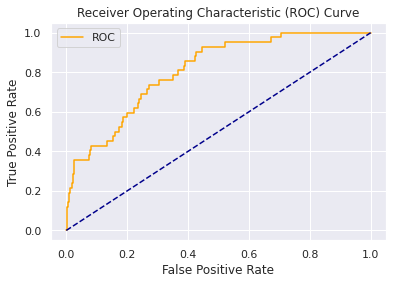

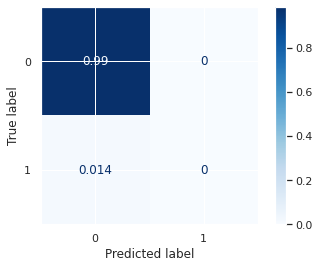

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

El modelo de regresion logistica es el que peor predice si llovio, dando como resultado un 0%. Aca habria que seguir analizando los hiperparametros.

## Decision Tree

Accuracy = 0.9798945286750165
ROC Area under Curve = 0.625916710319539
Cohen's Kappa = 0.27222750902470294
Time taken = 0.04366588592529297
              precision    recall  f1-score   support

           0    0.98865   0.99096   0.98980      2988
           1    0.30769   0.26087   0.28235        46

    accuracy                        0.97989      3034
   macro avg    0.64817   0.62592   0.63608      3034
weighted avg    0.97832   0.97989   0.97908      3034



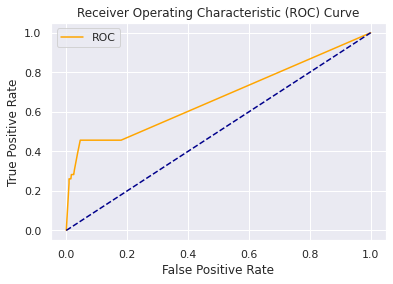

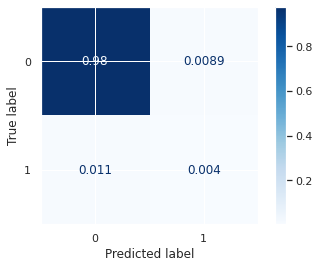

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Con el modelo de decision tree ya pasamos a tener una mejor prediccion de dias que va a llover que es del 28%.

## Random Forest

Accuracy = 0.986156888595913
ROC Area under Curve = 0.5434782608695652
Cohen's Kappa = 0.15795733883117924
Time taken = 19.95416784286499
              precision    recall  f1-score   support

           0    0.98614   1.00000   0.99302      2988
           1    1.00000   0.08696   0.16000        46

    accuracy                        0.98616      3034
   macro avg    0.99307   0.54348   0.57651      3034
weighted avg    0.98635   0.98616   0.98039      3034



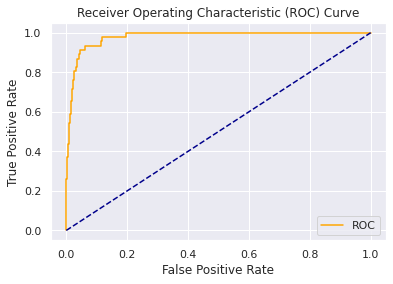

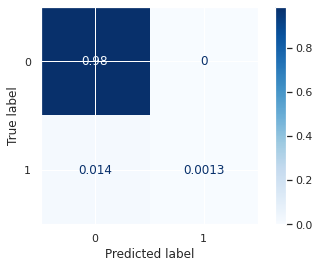

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 1000,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

El modelo de random fores no es tanto mejor que decision tree y da una prediccion inferior igual a 16%.

## Light GBM

Accuracy = 0.9864864864864865
ROC Area under Curve = 0.5757522845003201
Cohen's Kappa = 0.2508281037327905
Time taken = 0.6842331886291504
              precision    recall  f1-score   support

           0    0.98711   0.99933   0.99318      2988
           1    0.77778   0.15217   0.25455        46

    accuracy                        0.98649      3034
   macro avg    0.88244   0.57575   0.62386      3034
weighted avg    0.98393   0.98649   0.98198      3034



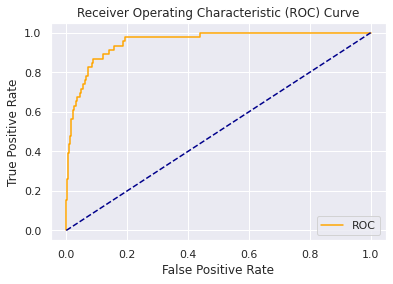

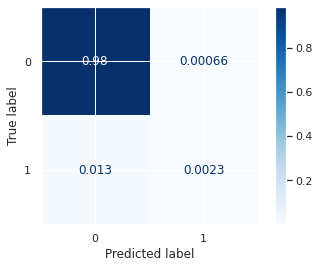

In [ ]:
# Light GBM
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

El modelo de Light GBM sigue sin poder superar la prediccion de decision tree dando como resultado 25%.

## XGBoost

Accuracy = 0.98681608437706
ROC Area under Curve = 0.6187285373377568
Cohen's Kappa = 0.34975031612336316
Time taken = 166.95905208587646
              precision    recall  f1-score   support

           0    0.98840   0.99833   0.99334      2988
           1    0.68750   0.23913   0.35484        46

    accuracy                        0.98682      3034
   macro avg    0.83795   0.61873   0.67409      3034
weighted avg    0.98384   0.98682   0.98366      3034



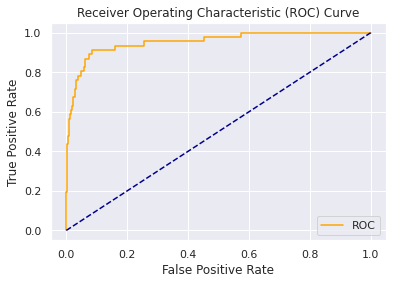

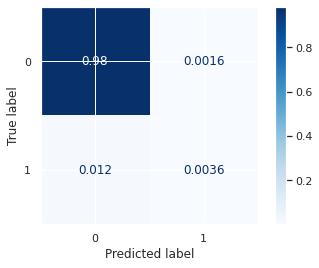

In [ ]:
# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 5000,
            'max_depth': 160}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

El modelo de XGBoost pasa a tener un mejor resultado de prediccion de dias que va a llover del 35%.

## Catboost

Accuracy = 0.988134475939354
ROC Area under Curve = 0.6301001105872767
Cohen's Kappa = 0.3957245286359211
Time taken = 145.27785801887512
              precision    recall  f1-score   support

           0    0.98874   0.99933   0.99401      2988
           1    0.85714   0.26087   0.40000        46

    accuracy                        0.98813      3034
   macro avg    0.92294   0.63010   0.69700      3034
weighted avg    0.98675   0.98813   0.98500      3034



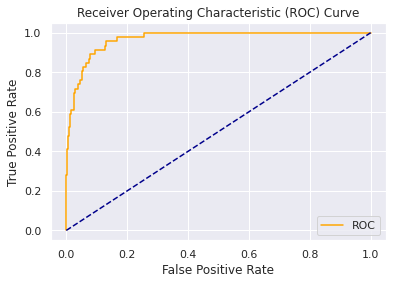

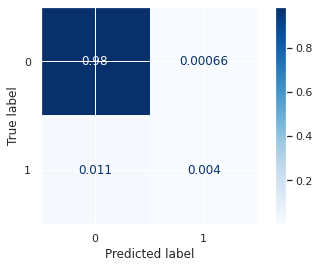

In [ ]:
# Catboost
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

El modelo de Catboost es el que se lleva el podio en lo modelos de prediccion, con un 40% de probabilidad de predecir que va a llover.

## Deep Learning

In [ ]:
#importing all libraries
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np 
import math
import random
import torch.nn as nn
#fix_random_state
random.seed(17)
np.random.seed(17)
torch.manual_seed(17)
torch.cuda.manual_seed(17)

In [ ]:
# Checking device: cuda or cpu
torch.cuda.is_available()
print(torch.cuda.get_device_name(0))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device 

Tesla K80


device(type='cuda')

In [ ]:
#cast to torchTensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)
X_test = X_test.to(device)

In [ ]:
# Let's create RainDataset with DataLoader

class RainDataset(Dataset):
    def __init__(self):
        self.x = X_train
        self.y = y_train
        self.n_samples = X_train.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
        
    def __len__(self):
        return self.n_samples

In [ ]:
dataset = RainDataset()

In [ ]:
#Create NetWork 
class NeuralNetwork(nn.Module):
    def __init__(self, first_neurons, n_hidden_neurons):
        super().__init__()
        self.fc1 = nn.Linear(first_neurons, n_hidden_neurons)
        self.activ1 = nn.ReLU()
        self.fc2 = nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = nn.ReLU()
        self.fc3 = nn.Linear(n_hidden_neurons, 2)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        return x

In [ ]:
myNet = NeuralNetwork(33, 114)
myNet = myNet.to(device)
myNet.parameters()
# list(myNet.parameters())
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(myNet.parameters(),  lr = 10 **(-4))

In [ ]:
from sklearn.metrics import *
acc_list = []
f_1_list = []
auc_list  = []

def training(model, batch_size, epochs, loss, optimizer):
    global acc_list, f_1_list, auc_list    
    for epoch in range(epochs):
        dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
        for (X_batch,y_batch) in dataloader:
            optimizer.zero_grad()
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            preds = model.forward(X_batch)
            loss_value = loss(preds, y_batch.long())
            loss_value.backward()
            optimizer.step()

        test_preds = model.forward(X_test)
        pred  = test_preds.argmax(dim=1).to('cpu')
        f1 = f1_score(y_test, pred)
        auc_score = roc_auc_score(y_test, pred)
        acc = accuracy_score(y_test, pred)
        acc_list.append(acc)
        f_1_list.append(f1)
        auc_list.append(auc_score)
        if (epoch + 1) % 2 == 0:
            print(f'epoch: {epoch + 1}, acc:{acc:.2%}, f1:{f1:.2%}, auc: {auc_score:.2%}')

In [ ]:
epoch = 100
batch_size = 1
training(myNet, batch_size, epoch, loss, optimizer)

epoch: 2, acc:98.55%, f1:8.33%, auc: 52.17%
epoch: 4, acc:98.55%, f1:8.33%, auc: 52.17%
epoch: 6, acc:98.55%, f1:8.33%, auc: 52.17%
epoch: 8, acc:98.55%, f1:8.33%, auc: 52.17%
epoch: 10, acc:98.48%, f1:0.00%, auc: 50.00%
epoch: 12, acc:98.55%, f1:8.33%, auc: 52.17%
epoch: 14, acc:98.52%, f1:11.76%, auc: 53.23%
epoch: 16, acc:98.52%, f1:11.76%, auc: 53.23%
epoch: 18, acc:98.48%, f1:4.17%, auc: 51.07%
epoch: 20, acc:98.45%, f1:11.32%, auc: 53.19%
epoch: 22, acc:98.52%, f1:11.76%, auc: 53.23%
epoch: 24, acc:98.55%, f1:12.00%, auc: 53.24%
epoch: 26, acc:98.52%, f1:8.16%, auc: 52.16%
epoch: 28, acc:98.42%, f1:11.11%, auc: 53.18%
epoch: 30, acc:98.45%, f1:11.32%, auc: 53.19%
epoch: 32, acc:98.48%, f1:8.00%, auc: 52.14%
epoch: 34, acc:98.42%, f1:11.11%, auc: 53.18%
epoch: 36, acc:98.52%, f1:8.16%, auc: 52.16%
epoch: 38, acc:98.45%, f1:11.32%, auc: 53.19%
epoch: 40, acc:98.42%, f1:11.11%, auc: 53.18%
epoch: 42, acc:98.35%, f1:10.71%, auc: 53.14%
epoch: 44, acc:98.45%, f1:4.08%, auc: 51.05%
epo

In [ ]:
acc_max = max(acc_list)
f1_max = max(f_1_list)
auc_max = max(auc_list)
acc_list = np.array(acc_list) * 10000 // 1 / 100
f_1_list = np.array(f_1_list) * 10000 // 1 / 100
auc_list  = np.array(auc_list) * 10000 // 1 / 100

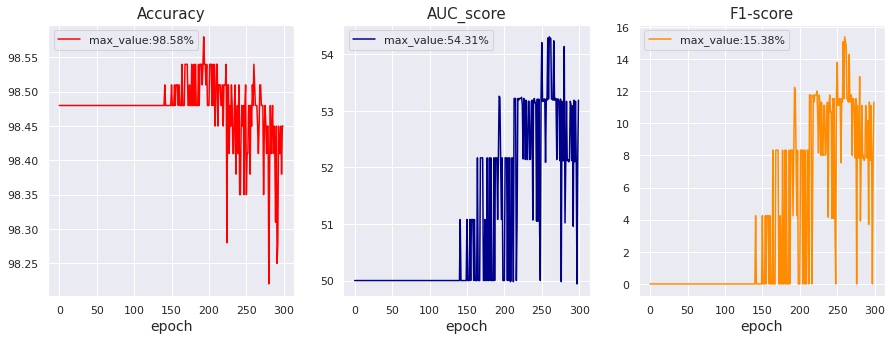

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.title('Accuracy', fontsize = 15 );
plt.grid(True)
plt.xlabel('epoch', fontsize=14)
plt.plot(acc_list, color='red', label = f'max_value:{acc_max:.2%}');
plt.legend();

plt.subplot(1,3,2)
plt.title('AUC_score', fontsize = 15 );
plt.grid(True)
plt.xlabel('epoch', fontsize=14)
plt.plot(auc_list , color='darkblue', label = f'max_value:{auc_max:.2%}');
plt.legend();

plt.subplot(1,3,3)
plt.title('F1-score', fontsize = 15 );
plt.grid(True)
plt.xlabel('epoch', fontsize=14)
plt.plot(f_1_list, color='darkorange', label = f'max_value:{f1_max:.2%}');
plt.legend();

Por ultimo, el modelo de deep learning solo alcanzo un 15% el cual no es gran cosa. Aca las conclusiones es que son necesario mas datos, actualmente tenemos solo 2 años y habria que analizar de realizar un mejor tratamiento de datos.